# **Project – Model Evaluation and Hyperparameter Tuning**


## **1. Objective**

The purpose of this project is to build, evaluate, and optimize machine learning models to predict the survival of passengers aboard the Titanic. This involves:

* Training multiple classification models
* Evaluating model performance using metrics like Accuracy, Precision, Recall, and F1-score
* Improving model performance using hyperparameter tuning (GridSearchCV and RandomizedSearchCV)
* Comparing model performance before and after tuning
* Selecting the best-performing model for deployment or further use


## **2. Import Libraries and Load Data**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
accuracy_score, precision_score, recall_score,
f1_score, confusion_matrix, ConfusionMatrixDisplay
)

In [39]:
# Load dataset
# df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **3. Data Preprocessing**

### 3.1 Handle Missing Values

In [40]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
# Fill missing 'Age' values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop 'Cabin' due to excessive missing values
df.drop('Cabin', axis=1, inplace=True)

# Drop remaining rows with missing values
df.dropna(inplace=True)

### 3.2 Encode Categorical Variables and Drop Unused Columns

In [42]:
# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop columns not useful for prediction
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

## **4. Train-Test Split**

In [43]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **5. Model Training (Before Tuning)**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

## **6. Model Evaluation (Before Tuning)**

In [45]:
# Evaluation function
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print()

# Evaluate all base models
for name, model in models.items():
    evaluate_model(name, model)

Model: Logistic Regression
Accuracy : 0.7865
Precision: 0.7067
Recall   : 0.7681
F1 Score : 0.7361

Model: Decision Tree
Accuracy : 0.7640
Precision: 0.6709
Recall   : 0.7681
F1 Score : 0.7162

Model: Random Forest
Accuracy : 0.7697
Precision: 0.6892
Recall   : 0.7391
F1 Score : 0.7133

Model: Support Vector Machine
Accuracy : 0.6854
Precision: 0.7097
Recall   : 0.3188
F1 Score : 0.4400



## **7. Confusion Matrices (Before Tuning)**

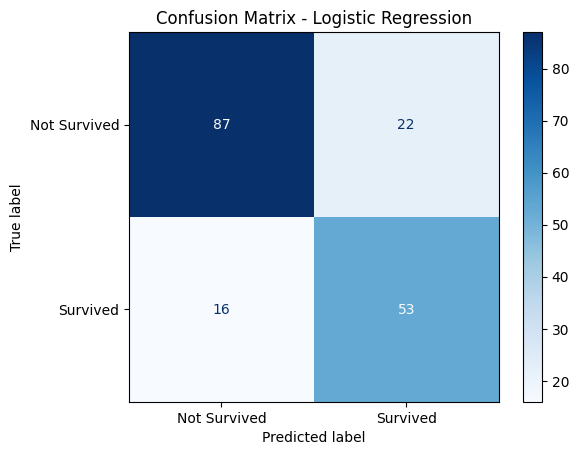

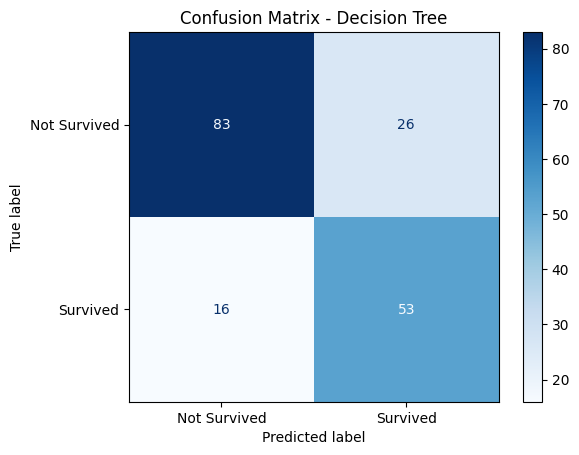

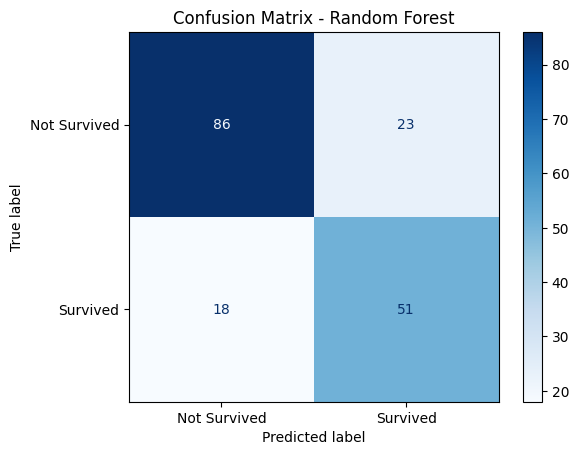

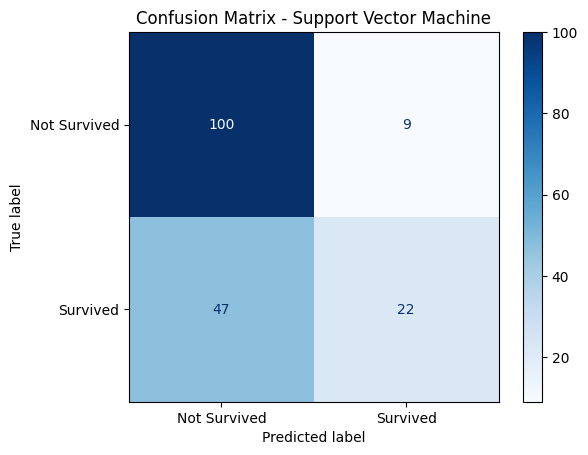

In [46]:
# Confusion matrix plotting function
def plot_conf_matrix(name, model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Plot confusion matrix for all base models
for name, model in models.items():
    plot_conf_matrix(name, model)

## **8. Hyperparameter Tuning**

### 8.1 GridSearchCV for Random Forest

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best Parameters (Random Forest):", grid_rf.best_params_)

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}


### 8.2 RandomizedSearchCV for Decision Tree

In [48]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

rand_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist_dt, n_iter=10, cv=5, random_state=42)
rand_dt.fit(X_train, y_train)
best_dt = rand_dt.best_estimator_

print("Best Parameters (Decision Tree):", rand_dt.best_params_)

Best Parameters (Decision Tree): {'min_samples_split': 2, 'max_depth': 3, 'criterion': 'gini'}


## **9. Evaluation of Tuned Models**

In [49]:
evaluate_model("Tuned Random Forest", best_rf)
evaluate_model("Tuned Decision Tree", best_dt)

Model: Tuned Random Forest
Accuracy : 0.7809
Precision: 0.7206
Recall   : 0.7101
F1 Score : 0.7153

Model: Tuned Decision Tree
Accuracy : 0.8202
Precision: 0.7606
Recall   : 0.7826
F1 Score : 0.7714



## **10. Confusion Matrices (After Tuning)**

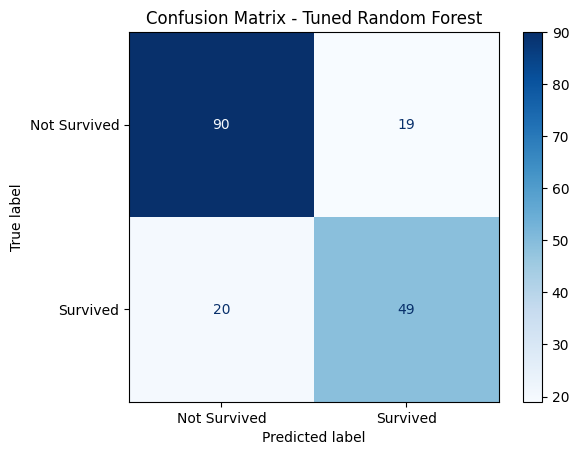

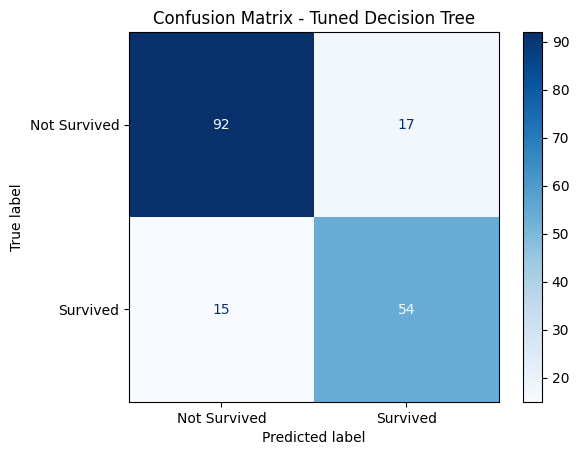

In [50]:
plot_conf_matrix("Tuned Random Forest", best_rf)
plot_conf_matrix("Tuned Decision Tree", best_dt)

## **11. Performance Summary Table**

In [51]:
results = []

# Add base models
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

# Add tuned models
results.append([
    "Tuned Random Forest",
    accuracy_score(y_test, best_rf.predict(X_test)),
    precision_score(y_test, best_rf.predict(X_test)),
    recall_score(y_test, best_rf.predict(X_test)),
    f1_score(y_test, best_rf.predict(X_test))
])

results.append([
    "Tuned Decision Tree",
    accuracy_score(y_test, best_dt.predict(X_test)),
    precision_score(y_test, best_dt.predict(X_test)),
    recall_score(y_test, best_dt.predict(X_test)),
    f1_score(y_test, best_dt.predict(X_test))
])

# Create DataFrame
summary_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
summary_df.sort_values(by="F1 Score", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
5,Tuned Decision Tree,0.820225,0.760563,0.782609,0.771429
0,Logistic Regression,0.786517,0.706667,0.768116,0.736111
1,Decision Tree,0.764045,0.670886,0.768116,0.716216
4,Tuned Random Forest,0.780899,0.720588,0.710145,0.715328
2,Random Forest,0.769663,0.689189,0.739130,0.713287
3,Support Vector Machine,0.685393,0.709677,0.318841,0.440000


## **12. Conclusion**

In this project, we built and evaluated several machine learning models to predict Titanic passenger survival. The steps followed included:

* Data preprocessing and transformation
* Training models such as Logistic Regression, Decision Tree, Random Forest, and SVM
* Evaluating model performance using standard classification metrics
* Tuning hyperparameters with GridSearchCV and RandomizedSearchCV
* Comparing models before and after tuning using performance metrics and confusion matrices

### Key Takeaways:

* The **Decision Tree model**, after tuning, achieved the highest overall performance in terms of accuracy and F1-score.
* **Hyperparameter tuning** significantly improved the performance of the Decision Tree and Random Forest classifiers.
* The tuned models showed better balance in predicting both survivors and non-survivors.

The final selected model can now be used for further tasks such as saving, deployment, or real-time predictions.

## Saving Clean data as `clean_data.csv`

In [52]:
df.to_csv('clean_data.csv', index=False)

## Save the Best Model (using `joblib`)

In [53]:
import joblib

# Save the trained model
joblib.dump(best_rf, "titanic_model.pkl")

['titanic_model.pkl']

This creates a file called `titanic_model.pkl` in working directory — it contains trained model.

## Load the Model (for predictions or deployment)

In [54]:
# Load the model back
loaded_model = joblib.load("titanic_model.pkl")

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)


## Deploy using Streamlit


## Step 4: Run the App

In terminal (where `app.py` is located), run:

```bash
streamlit run app.py
```

Then it will open in browser with a nice form to predict survival!
